In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data load
file_path = 'supermarket_sales - Sheet1.csv'
data = pd.read_csv(file_path)

In [4]:
# preliminary cleaning

# drop spaces
data.dropna(inplace=True)

# trasfer 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# transfer 'Time' to time form
data['Time'] = pd.to_datetime(data['Time']).dt.time

# categorical vars coding
label_encoders = {}
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

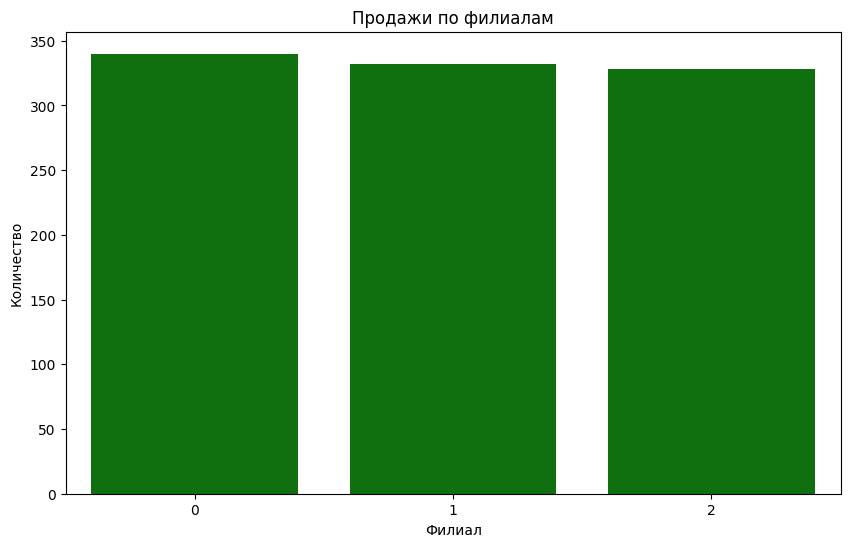

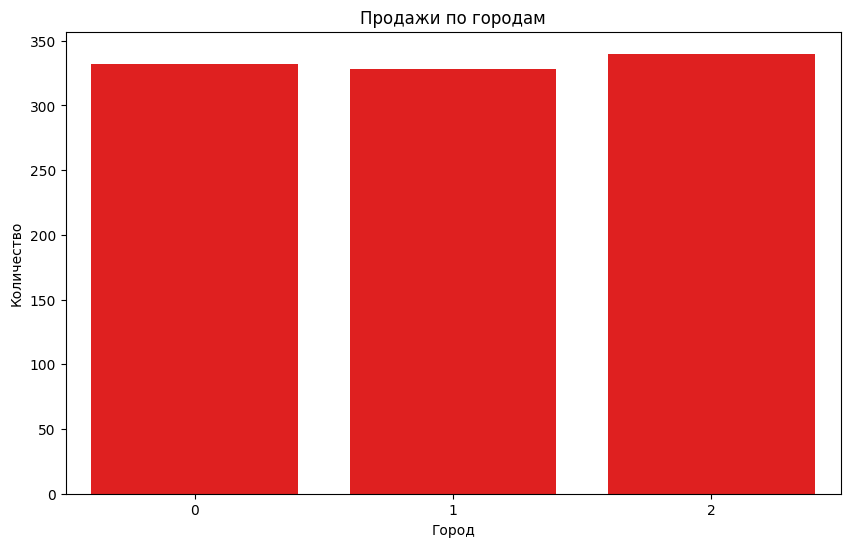

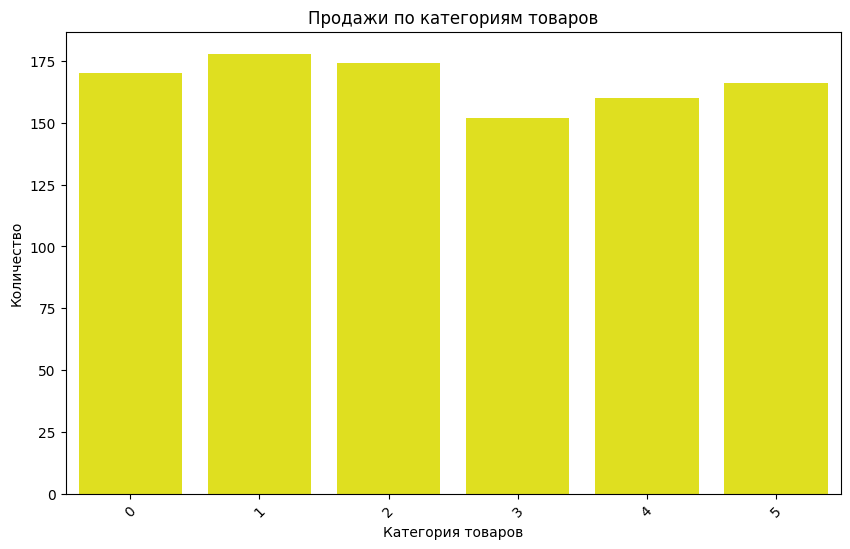

In [5]:
# Filial`s sales
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', data=data, color='green')
plt.xlabel('Филиал')
plt.ylabel('Количество')
plt.title('Продажи по филиалам')
plt.show()

# City sales
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=data, color='red')
plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Продажи по городам')
plt.show()

# Product line sales
plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', data=data, color='yellow')
plt.xlabel('Категория товаров')
plt.ylabel('Количество')
plt.title('Продажи по категориям товаров')
plt.xticks(rotation=45)
plt.show()

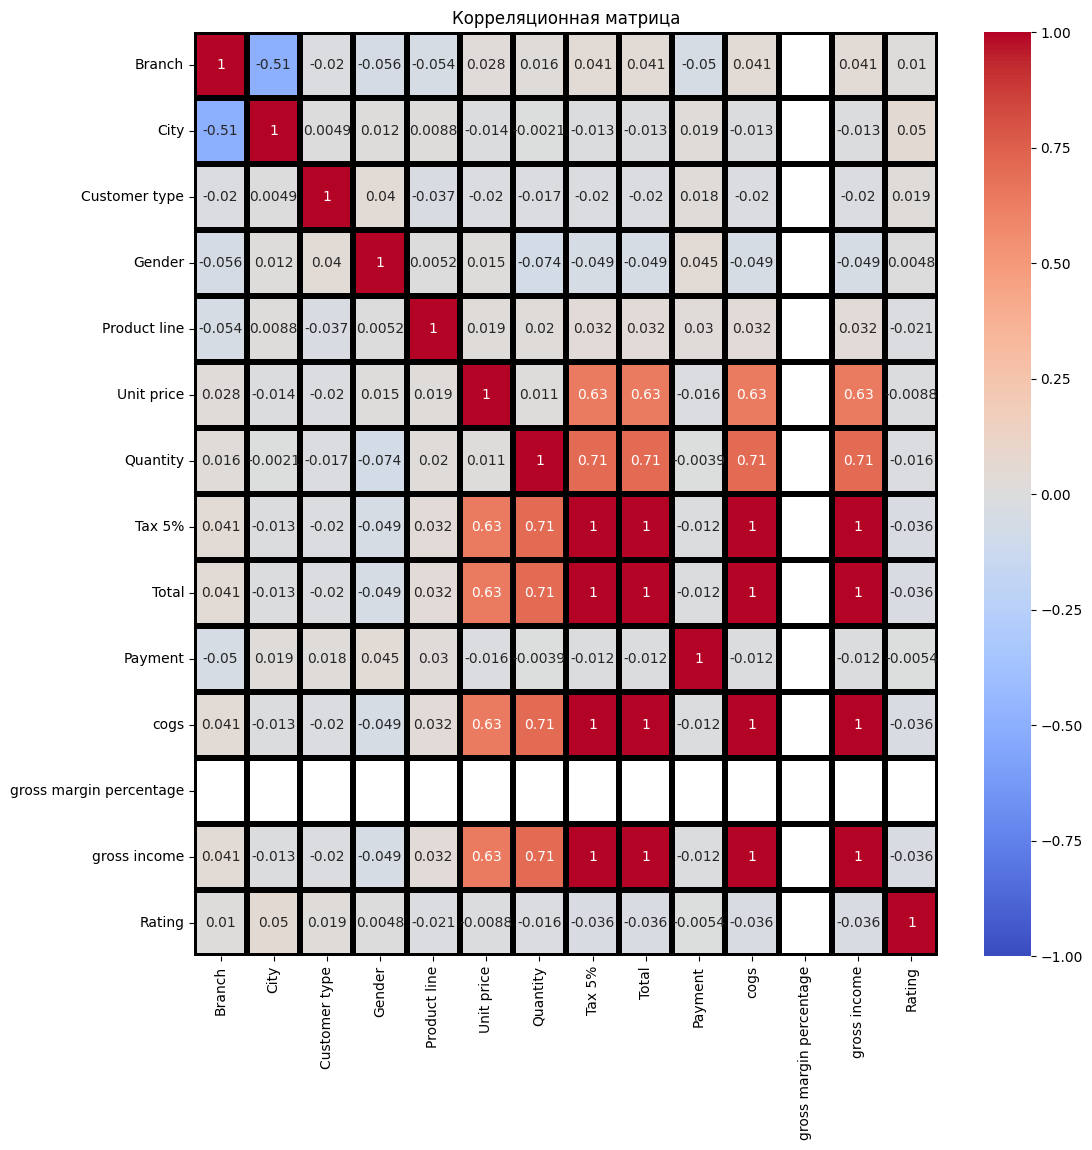

In [6]:
# matrix
fig, ax = plt.subplots(figsize=(12,12))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center=0, cmap= 'coolwarm', linewidths=3,linecolor='black', ax=ax) #corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [7]:
# Кластеризация

cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
X = data[cols]

In [8]:
%%time
#  TSNE

from sklearn.manifold import TSNE

tsne = TSNE(random_state=17, perplexity=25)

X_tsne = tsne.fit_transform(X)

CPU times: user 7.01 s, sys: 28.9 ms, total: 7.04 s
Wall time: 7.09 s


In [9]:
# рисование 2D

def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')
    plt.show()

In [10]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
#components_X_tsne.head()


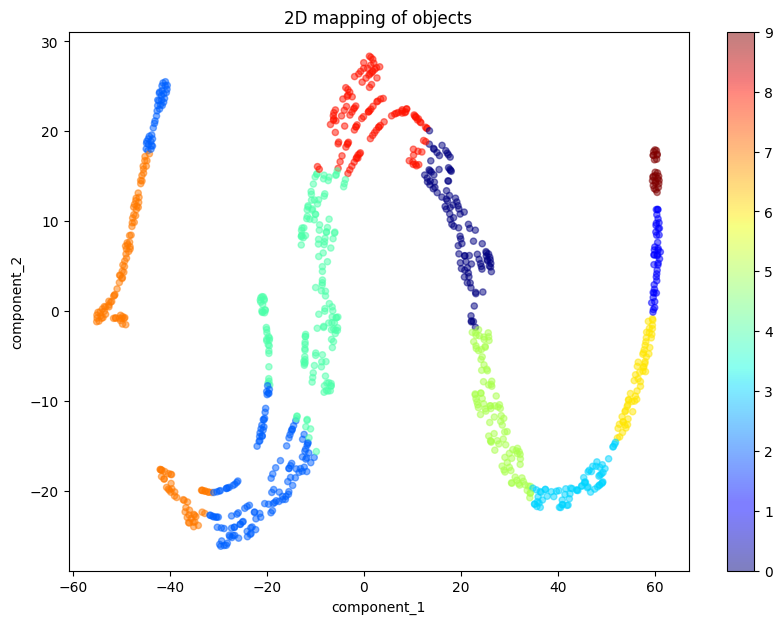

In [11]:
# KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

display_components_in_2D_space(components_X_tsne, labels=labels_clast)